# Mall Customer Segementation using K-Means Clustering



### Importing required Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [3]:
df = pd.read_csv("D:\Congnizance_2020\Mentor_Task\Datasets\Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Data Visualization

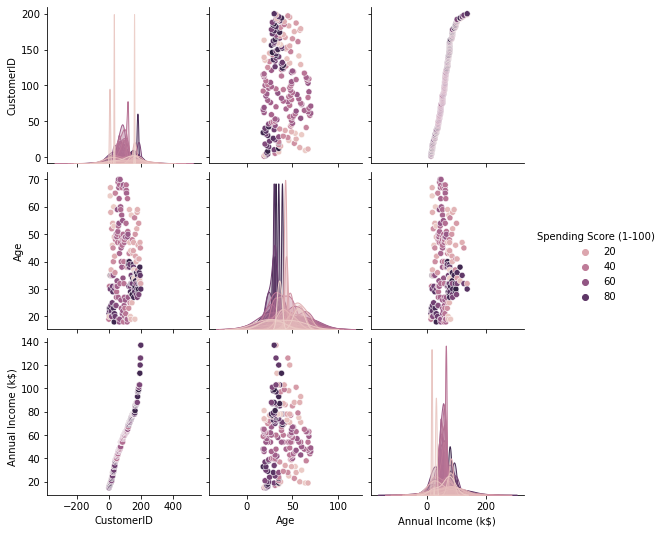

In [6]:
sns.pairplot(df, hue='Spending Score (1-100)')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

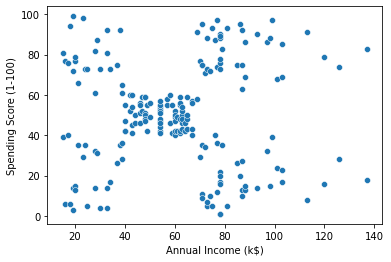

In [8]:
sns.scatterplot(df["Annual Income (k$)"],df['Spending Score (1-100)'])

In [12]:
X_data = df.iloc[:,3:5].values

### Finding the no of clusters using elbow method

In [14]:
inertias = []
mapping = {}
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X_data)
    inertias.append(model.inertia_)
    mapping[k] = model.inertia_

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

In [15]:
mapping

{1: 269981.28,
 2: 181363.59595959593,
 3: 106348.37306211118,
 4: 73679.78903948836,
 5: 44448.45544793371,
 6: 37233.81451071001,
 7: 30241.343617936593,
 8: 25044.967764018926,
 9: 21838.863692828912}

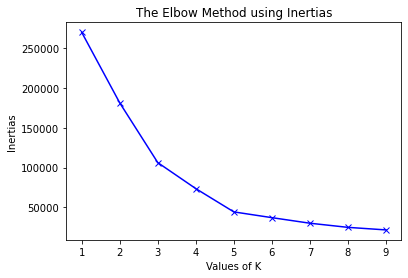

In [16]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertias')
plt.title('The Elbow Method using Inertias')
plt.show()

In [18]:
model = KMeans(n_clusters=5)
model.fit(X_data)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [26]:
print("The centroids are given: ", model.cluster_centers_)
X_data = np.concatenate([X_data, model.labels_.reshape(200,1)], axis=1)

The centroids are given:  [[86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]
 [88.2        17.11428571]]


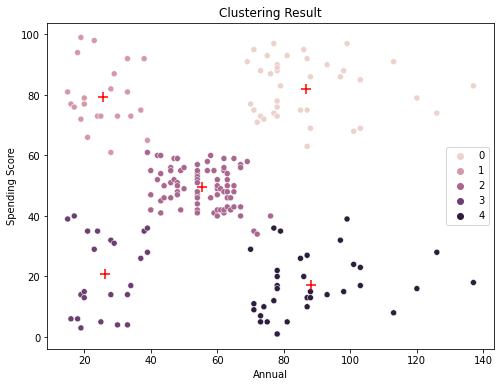

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_data[:,0], y=X_data[:,1], hue=X_data[:,2])
plt.xlabel('Annual')
plt.ylabel('Spending Score')
plt.title("Clustering Result")
for i, j in model.cluster_centers_:
   plt.scatter(i, j, s=100, c='red', marker='+')